In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from collections import Counter


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(np.__version__)
print(pd.__version__)

1.20.0
1.2.2


In [3]:
df=pd.read_csv('netflix_titles.csv')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.shape

(7787, 12)

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df = df.dropna(axis='rows')

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.shape

(4808, 12)

In [10]:
df.count()

show_id         4808
type            4808
title           4808
director        4808
cast            4808
country         4808
date_added      4808
release_year    4808
rating          4808
duration        4808
listed_in       4808
description     4808
dtype: int64

In [11]:
df.release_year.max()

2021

In [12]:
df.release_year.min()

1942

In [13]:
df['release_year'].value_counts()

2017    645
2018    624
2016    562
2019    488
2020    379
       ... 
1966      1
1942      1
1945      1
1964      1
1946      1
Name: release_year, Length: 71, dtype: int64

In [14]:
df['release_year'].isin([2021]).value_counts()

False    4804
True        4
Name: release_year, dtype: int64

In [15]:
th2021 = df[df['release_year'] == 2021 ].index
df.drop(th2021, inplace=True)

C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df['release_year'].isin([2021]).value_counts()

False    4804
Name: release_year, dtype: int64

In [17]:
df['release_year'].value_counts()

2017    645
2018    624
2016    562
2019    488
2020    379
       ... 
1946      1
1942      1
1945      1
1964      1
1944      1
Name: release_year, Length: 70, dtype: int64

In [18]:
df.loc[df['release_year']==2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [19]:
df.date_added = pd.to_datetime(df.date_added)


C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [22]:
df.loc[df['date_added'].dt.year == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,2021-01-07,2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,2009,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
104,s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,2021-01-01,2011,R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,2016,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b..."
493,s494,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,2021-01-13,2017,R,71 min,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...
...,...,...,...,...,...,...,...,...,...,...,...,...
6769,s6770,Movie,The Polar Express,Robert Zemeckis,"Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona...",United States,2021-01-01,2004,G,100 min,Children & Family Movies,"In this warm-hearted tale, a young boy's faith..."
6975,s6976,Movie,The Vanished,Peter Facinelli,"Thomas Jane, Anne Heche, Jason Patric, John D....",United States,2021-01-15,2020,R,115 min,Thrillers,When their daughter disappears during a family...
7145,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,2021-01-06,2020,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...
7351,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States",2021-01-01,2011,PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...


In [23]:
th2021_da = df[df['date_added'].dt.year == 2021].index
df.drop(th2021_da, inplace=True)


C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
(df['date_added'].dt.year == 2021).value_counts()

False    4730
Name: date_added, dtype: int64

In [25]:
df.loc[df['date_added'].dt.year == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [26]:
netflix_movies = df.loc[df['type'] == 'Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [27]:
mov_dur = netflix_movies['duration'].str.split(' ').str[0]


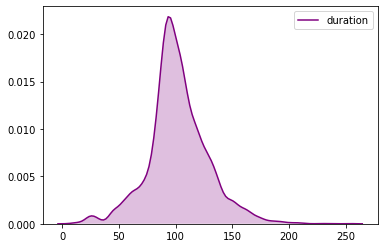

In [28]:
# y = mov_dur.value_counts()
# x = mov_dur.unique()

# plt.plot(x, y)
# plt.show()
sns.kdeplot(data=mov_dur, shade=True, color= 'purple' )

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


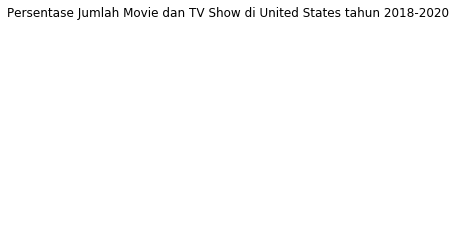

In [29]:
top3 =df[['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']] [df['country'].isin(['United States', 'India', 'United Kingdom'])]

top3_year =top3[['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']] [df['release_year'].isin(['2018', '2019', '2020'])]

us = top3_year[['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']] [df['country'].isin(['United States'])]

persentase = (us['type'].value_counts())
label= us['type'].unique()
plt.title('Persentase Jumlah Movie dan TV Show di United States tahun 2018-2020')
plt.pie((persentase), labels=label, autopct='%.2f')
plt.axis('equal')
plt.show()

NameError: name 'sb' is not defined

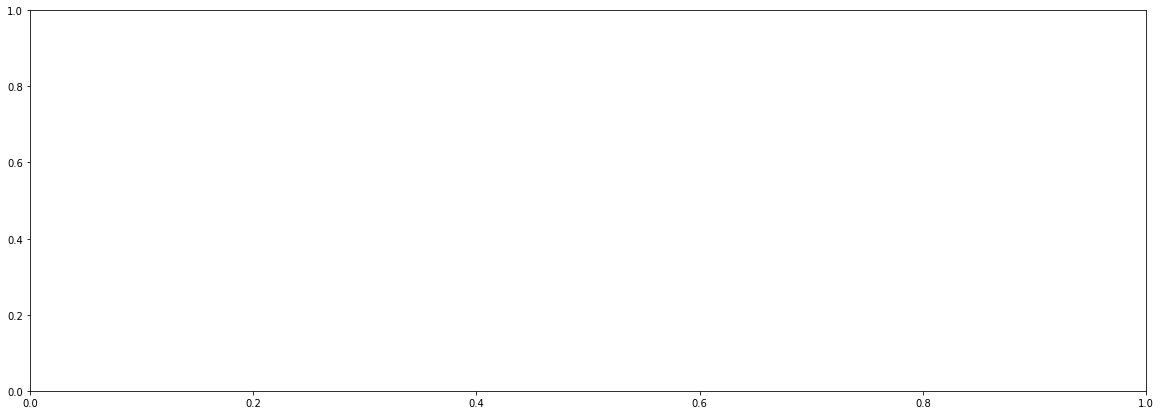

In [30]:
recent_10yrsA = df[df.release_year >= 2011]
top_yearsA = recent_10yrsA.groupby(['release_year'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_size = (20,7)
fig, ax = plt.subplots(figsize=fig_size)  
sb.pointplot(x='release_year',y='count',data=top_yearsA)

plt.title('Top Years Added Movies and TV Show',size='20')
plt.show()

In [ ]:
df['release_year'].isin([2020]).value_counts()

In [ ]:
df['release_year'].isin([2021])
df.loc[(df['release_year']== 2021)]